In [0]:
!pip install torch


!pip install torchvision
import numpy as np
import matplotlib as plt
import torch
import matplotlib.pyplot as plt 

You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.
     |██████                          | 3.5 MB 3.6 MB/

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 19.1 MB 86 kB/s 
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.


In [0]:
from torchvision import datasets
import torchvision.transforms as transforms
batch_size = 20
transform = transforms.ToTensor()

train_images = datasets.MNIST(download=True,root='data',train=True,transform=transform)
test_images = datasets.MNIST(download=True,root='data',train=False,transform=transform)
print('we have : ', len(train_images) , ' Train images ,and ',len(test_images) , ' Test images')

train_loader = torch.utils.data.DataLoader(train_images , batch_size=batch_size ,shuffle=True) 
test_loader = torch.utils.data.DataLoader(test_images , batch_size=batch_size ,shuffle=True) 

0.3%Downloading http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
100.0%
Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw
100.0%
Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


61.6%Downloading http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz to data/MNIST/raw/t10k-images-idx3-ubyte.gz
100.0%
Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

100.0%Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

we have :  60000  Train images ,and  10000  Test images



In [0]:
#20 is batch, size of the image 28 *28
#check data
checkdata=iter(train_loader)
img,lab=next(checkdata)
print(img.shape,lab.shape)

torch.Size([20, 1, 28, 28]) torch.Size([20])


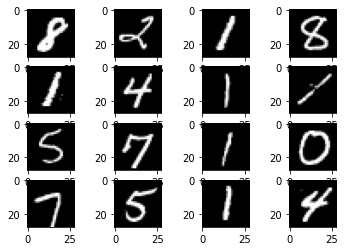

In [0]:
for i in range (16):
 plt.subplot(4,4,i+1)
 plt.imshow(img[i][0],cmap="gray")
plt.show()

In [0]:
#Defining the Neural Network Architecture
from torch import nn , optim
import torch.nn.functional as F

class neural_network(nn.Module):
    def __init__(self):
        super(neural_network,self).__init__()
        self.fc1 = nn.Linear(784,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)
    def forward(self,x):
        x = x.view(-1,784) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x),dim=1)
        return x
model = neural_network()
model

Out[9]: neural_network(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [0]:
#the loss function and the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)
#optimizer = torch.optim.Adam(model.parameters(), lr=.001)

In [0]:
#training the Neural network
epochs = 10
model.train()
for e in range (epochs):
    training_loss = 0
    for images , labels in train_loader:
    #print(images.size(0))
    #prevents accumulation of gradients
        optimizer.zero_grad()   
        output = model.forward(images)        #gives input and compute predicted output
        loss = loss_function(output,labels)     # loss calculation
        loss.backward()         #backward pass 
        optimizer.step()      #performs single optimization(parameter update) 


    print("Training Loss (ERROR) is : ",loss.item(),' for Epoch ',e+1)

Training Loss (ERROR) is :  0.636992335319519  for Epoch  1
Training Loss (ERROR) is :  0.29382696747779846  for Epoch  2
Training Loss (ERROR) is :  0.4331616461277008  for Epoch  3
Training Loss (ERROR) is :  0.091599240899086  for Epoch  4
Training Loss (ERROR) is :  0.34692278504371643  for Epoch  5
Training Loss (ERROR) is :  0.3307350277900696  for Epoch  6
Training Loss (ERROR) is :  0.15278707444667816  for Epoch  7
Training Loss (ERROR) is :  0.17064443230628967  for Epoch  8
Training Loss (ERROR) is :  0.40521079301834106  for Epoch  9
Training Loss (ERROR) is :  0.3359309434890747  for Epoch  10


In [0]:
#Testing the Neural to see it's accuracy
model.eval() #just to make the neural network know that we are in the evaluation mode so we dont  want to update the weights
correct_for_all = 0
for images , labels in (test_loader):
    output  = model(images)
    _ , pred = torch.max(output,1)  #comparing prediction to true value
    correct_for_batch = (pred.eq(labels))  
    correct_for_all +=correct_for_batch.sum()
print("Accuracy = ",(correct_for_all.item()/(len(test_loader)*batch_size))*100, "%")


Accuracy =  92.93 %
